In [1]:
# Merger rate for IMRIPY system when they throw away all of the dark matter before merging.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3


m_1 = 7   #in units of M☉
m_2 = 9  #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 
        



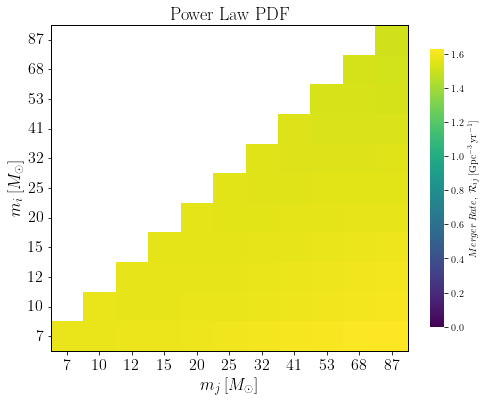

In [2]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



Merger_PWR_1 = np.load('Merger_PWR_1.npy')
Merge_haloPWR_1 = np.load('Merger_haloPWR_1.npy')


Merger_ratioPWR_1 = np.divide(Merge_haloPWR_1, Merger_PWR_1)


mask = np.tril(np.ones((11,11)), k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(8, 6))  





ax = sns.heatmap(Merger_ratioPWR_1, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)



ax.set_xticklabels(m_1_list, fontsize = 16)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 16)
ax.tick_params(left=True, bottom=True)




# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)


ax.invert_yaxis()
plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)  # m_j = m_2
plt.ylabel('$m_{i}\: [M_{\odot}]$', fontsize = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Power Law PDF ', fontsize = 18)
plt.savefig('1RPWR.pdf')
plt.show()     

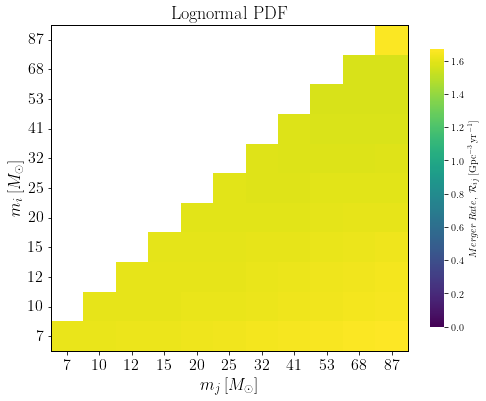

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



Merger_Lognormal_1 = np.load('Merger_Lognormal_1.npy')
Merger_haloLognormal_1 = np.load('Merger_haloLognormal_1.npy') 



Merger_ratioLognormal_1 = np.divide(Merger_haloLognormal_1, Merger_Lognormal_1)


mask = np.tril(np.ones((11,11)), k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(8, 6))  
 




ax = sns.heatmap(Merger_ratioLognormal_1, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)



ax.set_xticklabels(m_1_list, fontsize = 16)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 16)
ax.tick_params(left = True, bottom = True)




# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)


ax.invert_yaxis()
plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)  # m_j = m_2
plt.ylabel('$m_{i}\: [M_{\odot}]$', fontsize = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Lognormal PDF ', fontsize = 18)
plt.savefig('1RLognormal.pdf')
plt.show()     

In [4]:
m_1 = 1e-3   #in units of M☉
m_2 = 10*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)



y_list = np.zeros(11)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))

for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + (i*np.exp(dy)))

    
    



Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] =  np.exp(np.log(m_1) + 0.5*dy ) - np.exp(np.log(m_1) - 0.5*dy)
    
    
print("m_1 = ", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


 
# Formatting x and y-axis labels.

def sciformat_3(x):
    n = np.floor(np.log10(x))
    m = x*(10.0**(-n))
    str1 = ""
    if (n in [0, 1]):
        return r'$%d$'%(x,)
    elif (m > 1.001):
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
    else:
        str2 = r'$10^{%d}$' % n
    return str1 + str2

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)
    



m_1 =  [1.00000e-03 1.00010e+01 2.00010e+01 3.00010e+01 4.00010e+01 5.00010e+01
 6.00010e+01 7.00010e+01 8.00010e+01 9.00010e+01 1.00001e+02] M☉

Δ_1 = [2.84604989e-03 2.84633450e+01 5.69238439e+01 8.53843429e+01
 1.13844842e+02 1.42305341e+02 1.70765840e+02 1.99226339e+02
 2.27686838e+02 2.56147337e+02 2.84607835e+02]


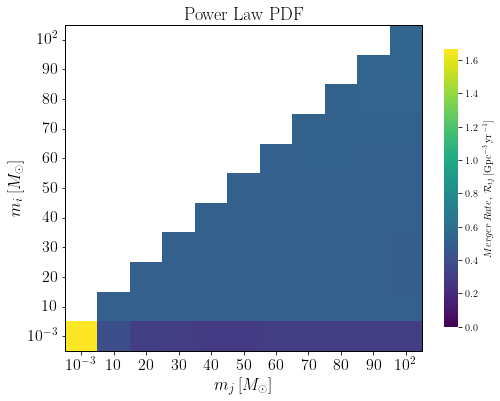

In [5]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



Merger_PWR_2 = np.load('Merger_PWR_2.npy')
Merger_haloPWR_2 = np.load('Merger_haloPWR_2.npy')


Merger_ratioPWR_2 = np.divide(Merger_haloPWR_2, Merger_PWR_2)


mask = np.tril(np.ones((11,11)), k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(8, 6))  





ax = sns.heatmap(Merger_ratioPWR_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)



ax.set_xticklabels(xlabel_list, fontsize = 16)
ax.set_yticklabels(ylabel_list, rotation = 360, fontsize = 16)
ax.tick_params(left=True, bottom=True)




# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)


ax.invert_yaxis()
plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)  # m_j = m_2
plt.ylabel('$m_{i}\: [M_{\odot}]$', fontsize = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Power Law PDF ', fontsize = 18)
plt.savefig('2RPWR.pdf')
plt.show()     

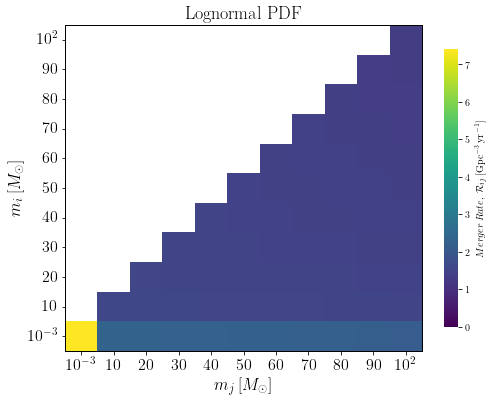

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



Merger_Lognormal_2 = np.load('Merger_Lognormal_2.npy')
Merger_haloLognormal_2 = np.load('Merger_haloLognormal_2.npy') 



Merger_ratioLognormal_2 = Merger_haloLognormal_2/Merger_Lognormal_2




mask = np.tril(np.ones((11,11)), k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(8, 6))  
 




ax = sns.heatmap(Merger_ratioLognormal_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)



ax.set_xticklabels(xlabel_list, fontsize = 16)
ax.set_yticklabels(ylabel_list,rotation = 360, fontsize = 16)
ax.tick_params(left = True, bottom = True)




# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)


ax.invert_yaxis()
plt.xlabel('$m_{j}\:[M_{\odot}]$', fontsize = 17)  # m_j = m_2
plt.ylabel('$m_{i}\: [M_{\odot}]$', fontsize = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Lognormal PDF ', fontsize = 18)
plt.savefig('2RLognormal.pdf')
plt.show()     